## Clustering Assignment


HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.

Objective : To categorise the countries that are in the need of aid based on some social, economic and health factors that determine the overall development of the country.


## Step 1 : Reading and Understanding the data

In [1]:
# Supress the  Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
df = pd.read_csv('Country-data.csv', encoding="ISO-8859-1", header=0)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### (i) Inspect the various aspects of country dataset

In [3]:
# shape
df.shape

(167, 10)

In [4]:
# Basic information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Descriptive statistics to have an idea about the variables
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### (ii) Data Quality Checks and handling missing values

In [6]:
# missing values
round(100*(df.isnull().sum())/len(df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

***Thus, the above analysis clearly indicates that there are no NAN values in the dataset***


#### (iii) The variables export , health and import are given as the percentage of GDP per capita. 

In order to have a true picture about the country's development it is important to convert these variables into absolute value.For example Austria and Belarus have almost same exports % but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.


In [7]:
#Converting exports,imports and health spending percentages to absolute values.

df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [8]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
#Looking for spelling mistakes
print(df['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

There is no spelling mistake. Thus we can proceed with univariate and bivariate analysis.

## Step 2 : Visualizing the data : EDA

In [10]:
factors = df.columns[1:]
for i in enumerate (factors):
    print (i)

(0, 'child_mort')
(1, 'exports')
(2, 'health')
(3, 'imports')
(4, 'income')
(5, 'inflation')
(6, 'life_expec')
(7, 'total_fer')
(8, 'gdpp')


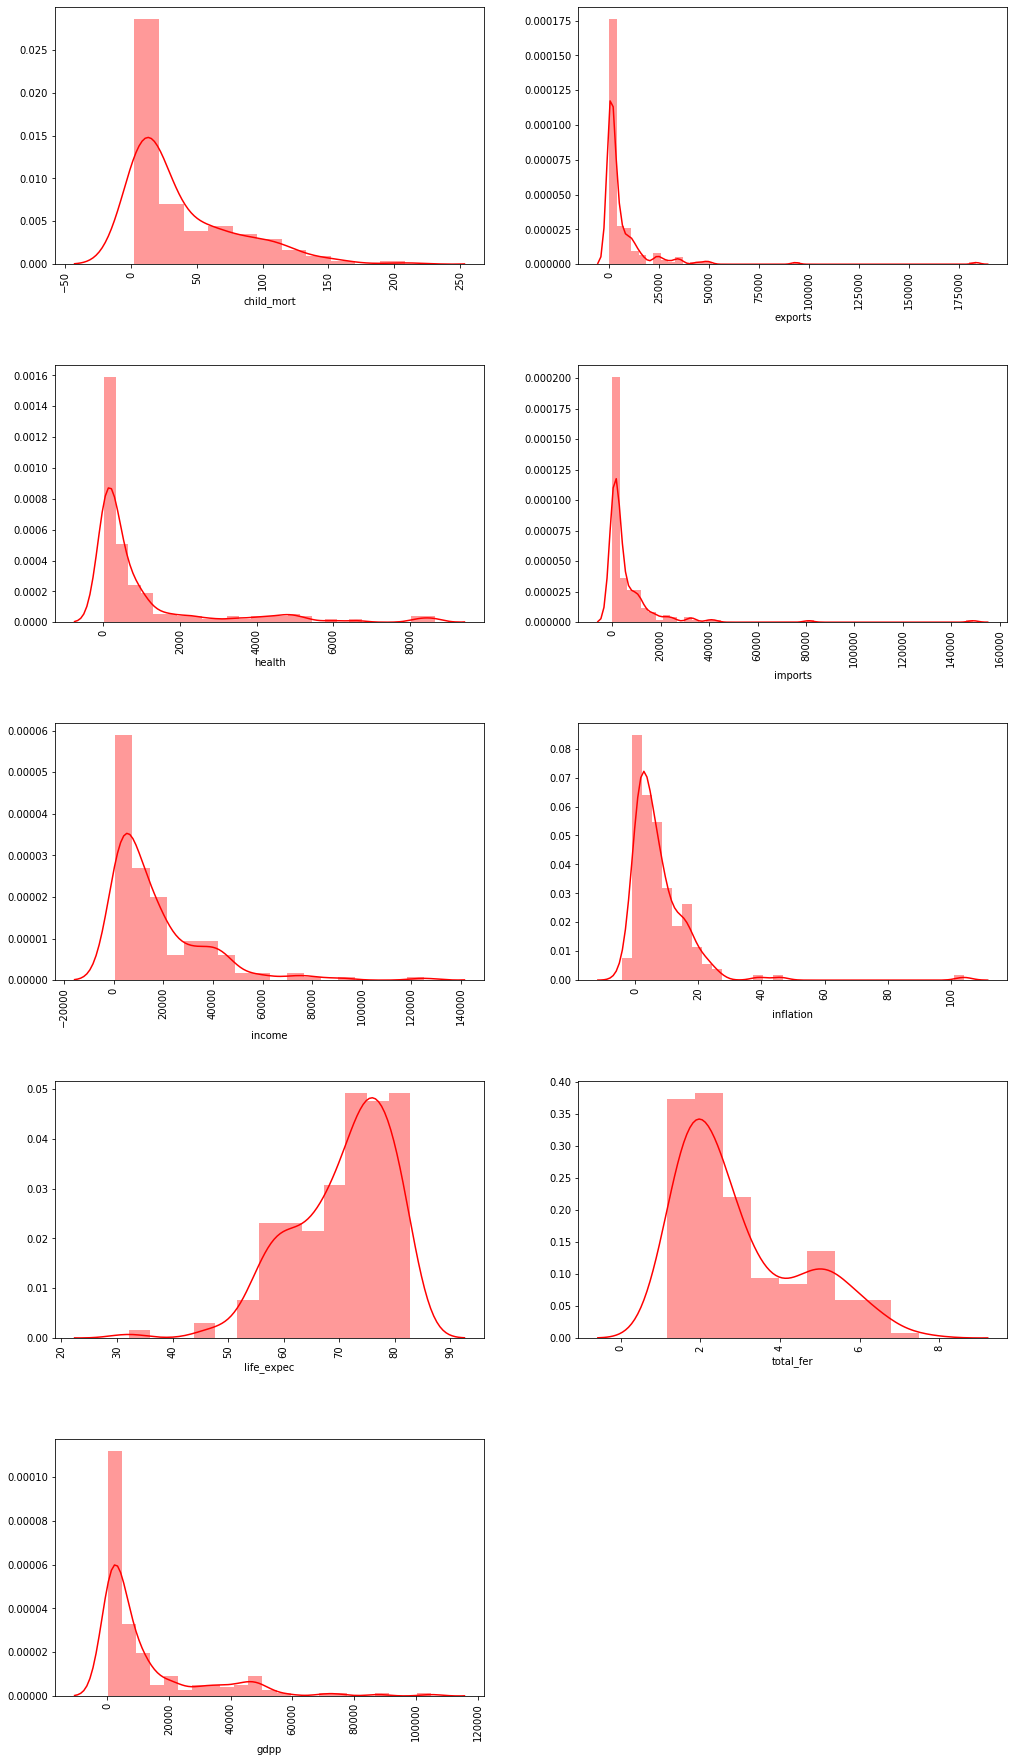

In [11]:
plt.figure(figsize = (15,25))
for i in enumerate(factors):
    plt.subplot(5,2,i[0]+1)
    plt.tight_layout(pad=4.0)
    sns.distplot(df[i[1]], hist = True , color = 'r')
    plt.tight_layout(pad=4.0)
    plt.xticks(rotation = 90)


Inference of the unilateral analysis :
1. The variables Imports and exports follow same distributions 
2. The life expectancy distribution curve skewed leftside while total fertility curve is skewed rightwards.
3. GDP per capita and income too followed same pattern . There are many countries whose gdp per capita and income falls betweent the range of 0-20000.

<Figure size 288x288 with 0 Axes>

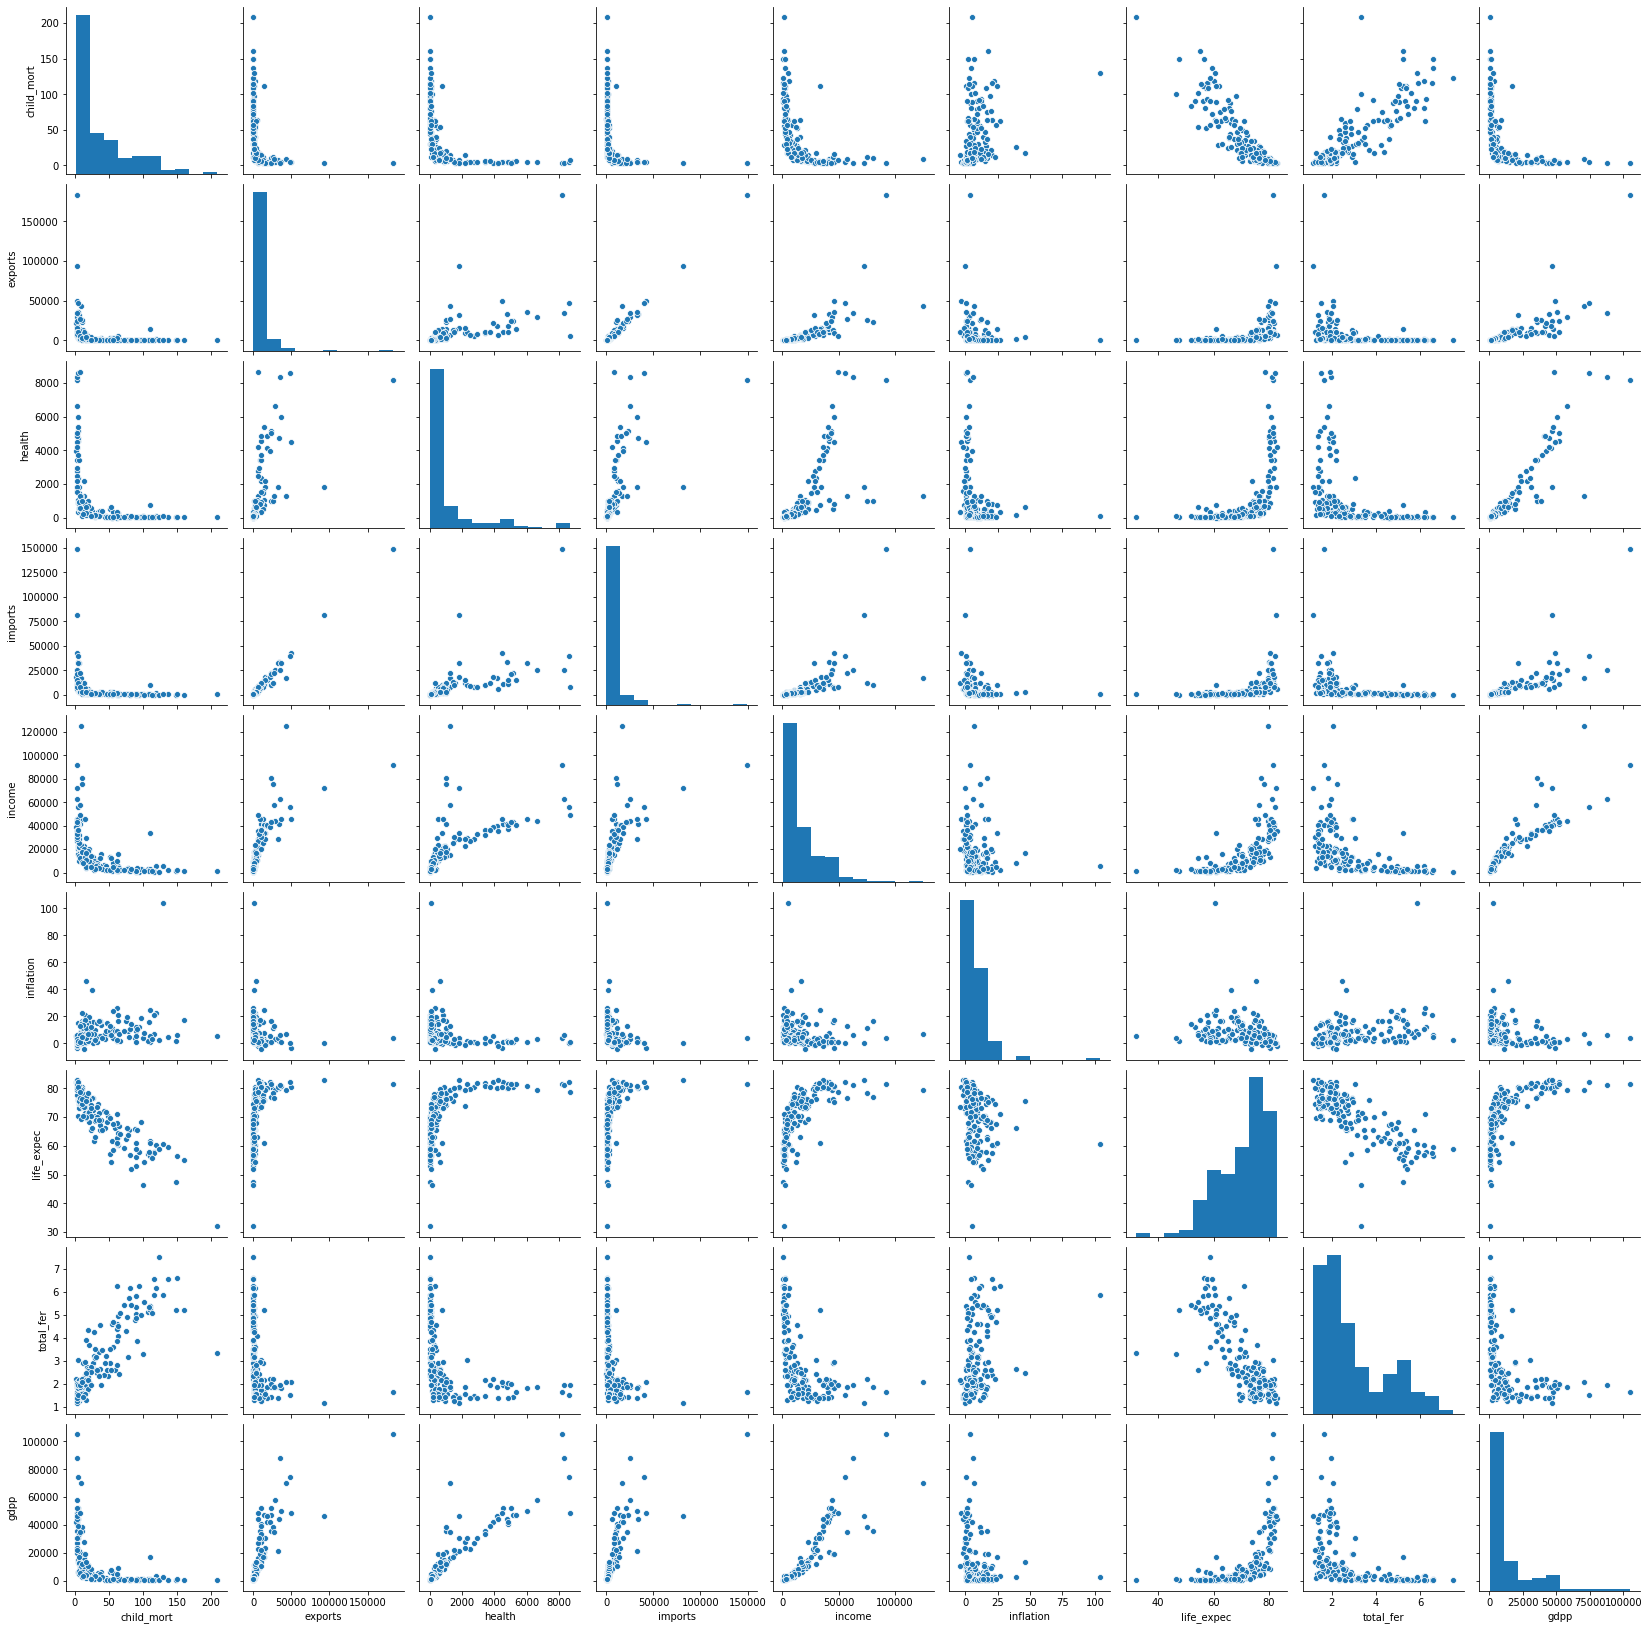

In [12]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(df)
plt.show()

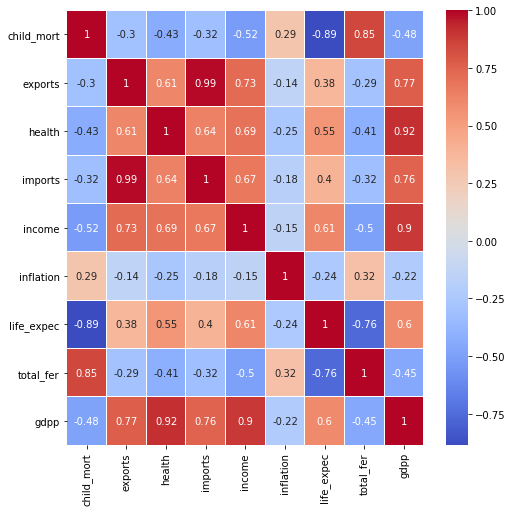

In [13]:
#  Lets look at the heatmap to see which variables are highly correlated
plt.figure(figsize = (8,8)) 
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linecolor = 'white', linewidths=0.1)
plt.show()

The heat map indicates :
1. High positive correlation between income and GDP per capita.
2. High positive correlation between health expenditure and GDP per capita.
3. High negative correlation between life expectancy and child mortality.


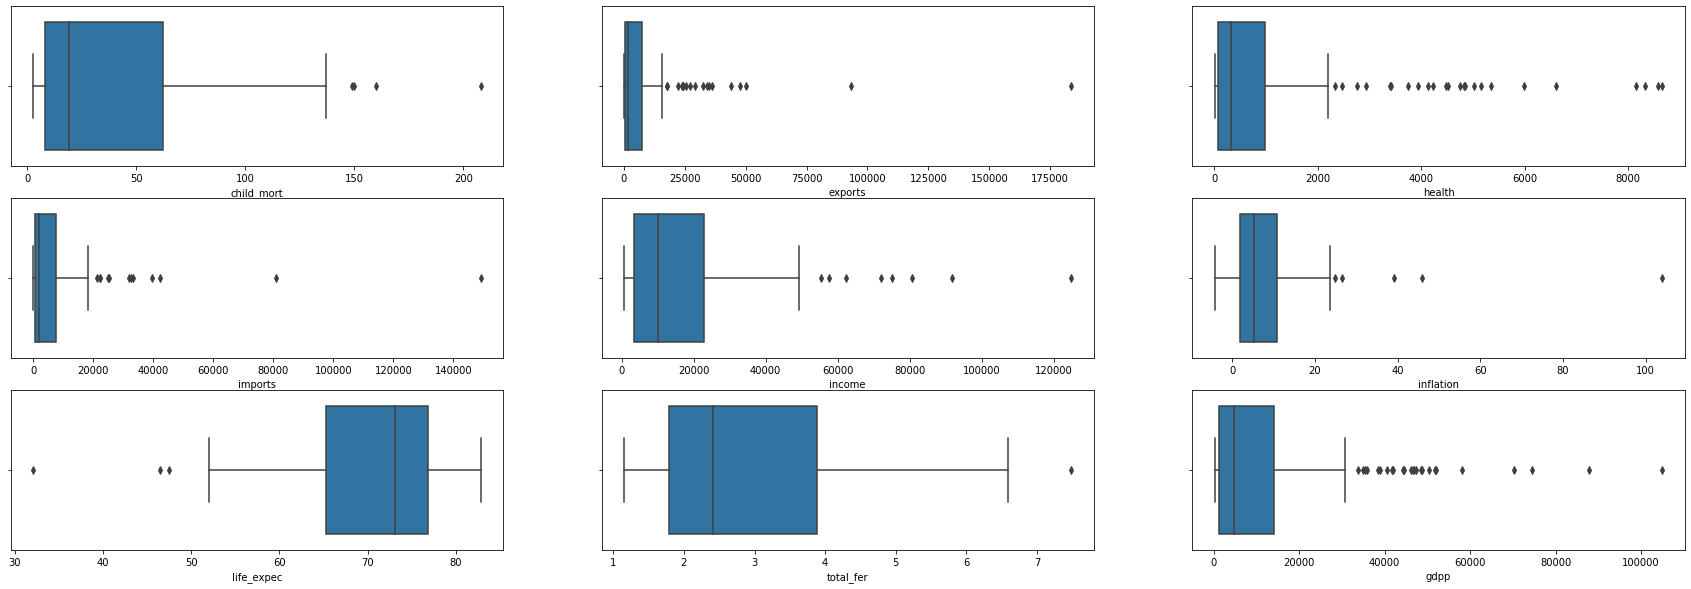

In [14]:
# Outliers
plt.figure(figsize = (30,10))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]])

The box plot analysis indicates the presence of outliers in almost all factors:

1) Inflation and Child Mortality -In both the cases ,  we can treat only the lower range outliers as treating the high range outliers gives information about the countries which may require more aid.

2) For all other columns we will treat only the upper range outliers since all these columns indicates the good health of the economy and by treating the lower end outliers, we may end up loosing some information about the countries that are in the need of aid.


In [15]:
df.shape

(167, 10)

In [16]:
# This we are treating upper range outliers for the followimg variables except child mortality rate and inflation

q1 = df["imports"].quantile(0.99)

df["imports"][df["imports"]>= q1] = q1

q2 = df["exports"].quantile(0.99)

df["exports"][df["exports"]>= q2] = q2

q3 = df["health"].quantile(0.99)

df["health"][df["health"]>= q3] = q3

q4 = df["income"].quantile(0.99)

df["income"][df["income"]>= q4] = q4

q5 = df["life_expec"].quantile(0.99)

df["life_expec"][df["life_expec"]>= q5] = q5

q6 = df["total_fer"].quantile(0.99)

df["total_fer"][df["total_fer"]>= q6] = q6

q7 = df["gdpp"].quantile(0.99)

df["gdpp"][df["gdpp"]>= q7] = q7


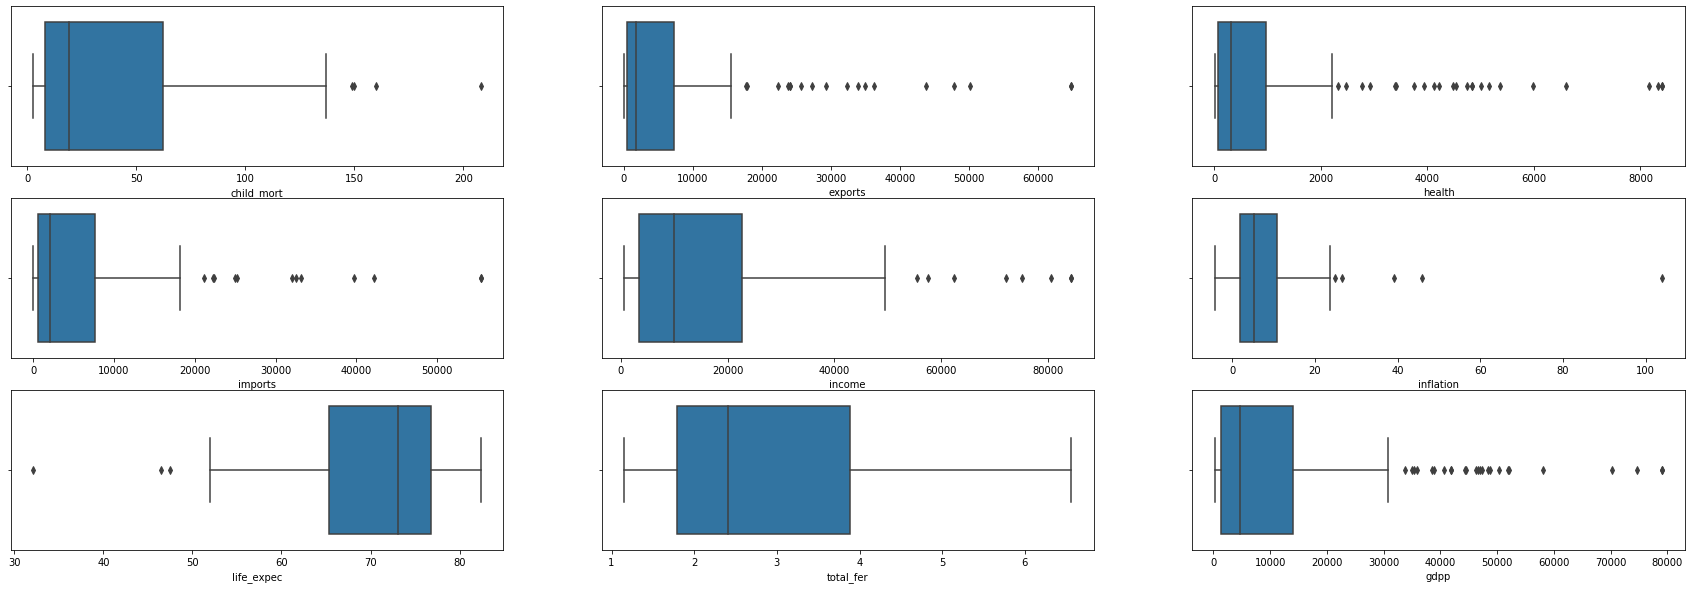

In [17]:
plt.figure(figsize = (30,10))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]])

## Step 3 : Preparing the data for modeling

In [18]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

The Hopkins statistic helps us to check the cluster tendency of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed.

A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

In [19]:
# Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
hopkins(df.drop('country', axis = 1))

0.9099739767541207

The hopkins score varies between 0 and 1. It the score lies between 0.77 and 0.99,  it has a high tendency to cluster.
In our case , the hopkins score is 0.93 which implies that clustering analysis can be applied in the above mentioned data.

In [21]:
#rescaling
rf_df = df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rf_df)
rfm_df_scaled.shape

(167, 9)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('country', axis = 1))
df1

array([[ 1.29153238, -0.56962212, -0.56695778, ..., -1.61970522,
         1.92639646, -0.70225949],
       [-0.5389489 , -0.47385792, -0.4403934 , ...,  0.64883094,
        -0.86505432, -0.49872564],
       [-0.27283273, -0.42399973, -0.48627082, ...,  0.67140344,
        -0.03498262, -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54024972, ...,  0.28767096,
        -0.66423052, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55242911, ..., -0.34435902,
         1.15657191, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227159, ..., -2.09372771,
         1.64524315, -0.6500669 ]])

In [23]:
df1 = pd.DataFrame(df1, columns = df.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619705,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.648831,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.671403,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179541,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.705262,-0.543736,-0.032042


## Step 4 : Modeling

### K MEANS CLUSTERING 

#### Initiating the value of K 

Two methods :
1. Elbow Curve
2. Silhouette analysis

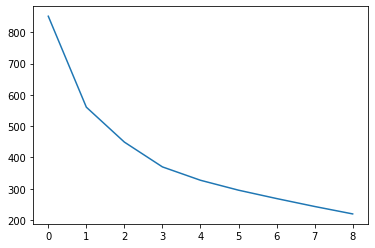

In [24]:
# elbow-curve/SSD
# sum of squared distances
ssd = []
for num_clusters in list(range(2,11)):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

The elbow curve indicates that the elbow lies in the range of 3 to 5 , so let us take k as 3

In [25]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.47849207268358157
For n_clusters=3, the silhouette score is 0.4233188560305591
For n_clusters=4, the silhouette score is 0.40915114586718
For n_clusters=5, the silhouette score is 0.4155933513446923
For n_clusters=6, the silhouette score is 0.2842124716675296
For n_clusters=7, the silhouette score is 0.3221570799597478
For n_clusters=8, the silhouette score is 0.28995000887624134


The silhouette analysis indicates the highest peak occurs at 5. 

Thus by considering the silhouette analysis and elbow curve, we are proceeding with k as 3 

From business prespective, it would be difficult to provide aid to all the countries in 5 clusters. Therefore, it would be viable to go for 3 clusters.

In [26]:
# final model with k=3
kmeans = KMeans(n_clusters=3, random_state=50)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [27]:
df_kmean = df.copy()

In [28]:
label = pd.DataFrame(kmeans.labels_,columns=['label'])
label.head()

,label
0,2
1,0
2,0
3,2
4,0


In [29]:
df_kmean= pd.concat([df_kmean,label],axis=1)
df_kmean.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [30]:
df_kmean.label.value_counts()

0    92
2    48
1    27
Name: label, dtype: int64

K means has classified the different countries into 3 clusters based on socio-economic features. 
The analysis illustates that most of the countries fall under cluster 1 (index 0)  while there are only 29 countries in cluster 2 (index 1).

#### Scatter plot 

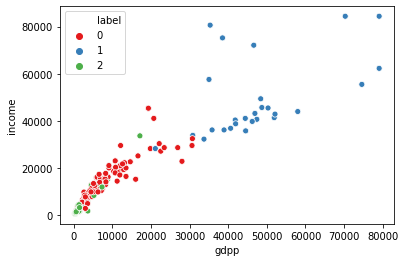

In [31]:
sns.scatterplot(x='gdpp', y = 'income', hue= 'label', data = df_kmean, palette = 'Set1')

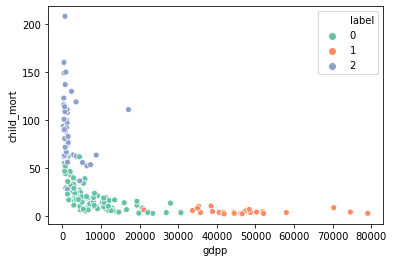

In [32]:
sns.scatterplot(x='gdpp', y = 'child_mort', hue= 'label', data = df_kmean, palette = 'Set2')

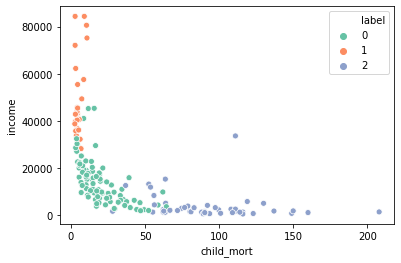

In [33]:
sns.scatterplot(x='child_mort', y = 'income', hue= 'label', data = df_kmean, palette = 'Set2')

## Step 5 : Cluster Profiling 

From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. Therefore, we are proceeding with the clustering  anlaysis with these three variables.


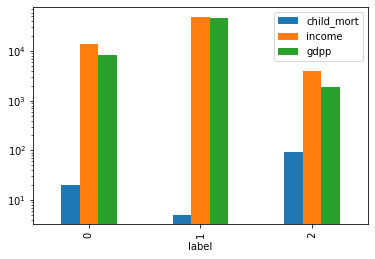

In [34]:
df_kmean.drop(['country','exports', 'health', 'imports', 
       'inflation', 'life_expec', 'total_fer'],axis=1).groupby('label').mean().plot(kind='bar')
plt.yscale('log')

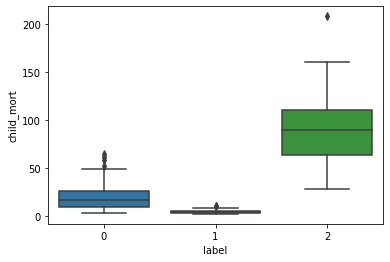

In [35]:
sns.boxplot(x = "label", y = 'child_mort', data = df_kmean)

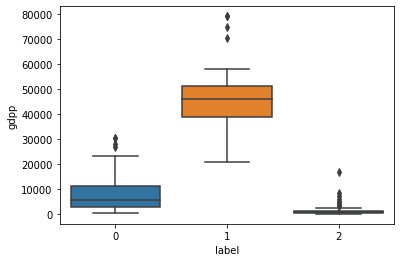

In [36]:
sns.boxplot(x = "label", y = 'gdpp', data = df_kmean)

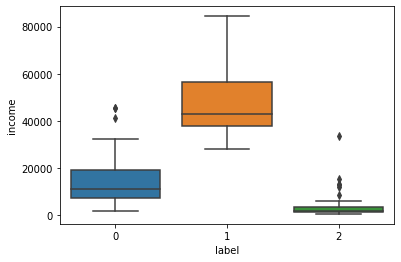

In [37]:
sns.boxplot(x = "label", y = 'income', data = df_kmean)

The Box plot and Bar analysis clearly indicates that the child mortality rate is higher in cluster 2 . Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in cluster 2 .It reflects that countries in cluster 2 need an urgent aid.


In [38]:
df_kmean[df_kmean['label'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,2
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,2


In [39]:
df_kmean[df_kmean['label'] == 2].sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,2


Thus from the K-MEANS ANALYSIS , we can infer that the following are the countries that HELP International should consinder for providing aid :
1. Haiti
2. Sierra leone
3. Chad
4. Central African Republic
5. Mali

## Hierarchical Clustering

In [40]:
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619705,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.648831,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.671403,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179541,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.705262,-0.543736,-0.032042
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.452874,-0.503105,-0.458563,-0.776821,-0.489784,-0.852240,0.373359,-0.563175
163,-0.526514,-0.236420,-0.219189,-0.372256,-0.019971,3.616865,0.547255,-0.316136,0.042765
164,-0.372315,-0.491607,-0.540250,-0.513337,-0.690802,0.409732,0.287671,-0.664231,-0.658699
165,0.448417,-0.539950,-0.552429,-0.577202,-0.691361,1.500916,-0.344359,1.156572,-0.658699


In [41]:
df1 = pd.DataFrame(df1, columns = df.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619705,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.648831,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.671403,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179541,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.705262,-0.543736,-0.032042


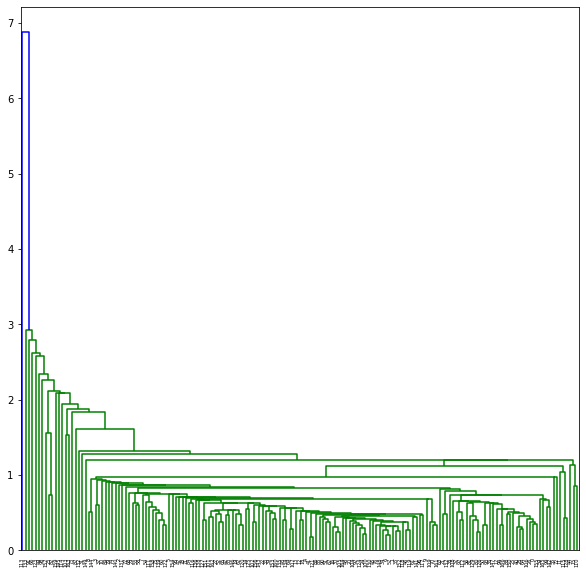

In [42]:
# single linkage
fig = plt.figure(figsize = (10,10))
mergings = linkage(df1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

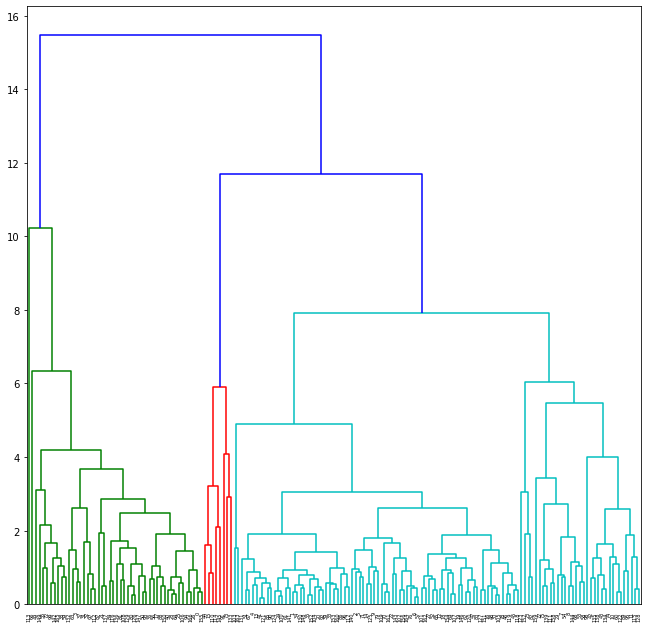

In [43]:
# complete linkage
fig = plt.figure(figsize = (11,11))
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [44]:
## Let cut the tree at height of approx 11 to get 3 clusters and see if it get any better cluster formation. 
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [45]:
df_hierarchy = df.copy()

In [46]:
# assign cluster labels
df_hierarchy['cluster_labels'] = cluster_labels
df_hierarchy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [47]:
df_hierarchy.cluster_labels.value_counts()

1    111
0     48
2      8
Name: cluster_labels, dtype: int64

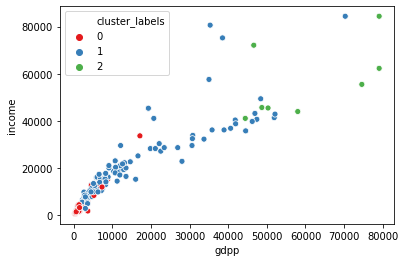

In [48]:
sns.scatterplot(x='gdpp', y = 'income', hue= 'cluster_labels', data = df_hierarchy, palette = 'Set1')

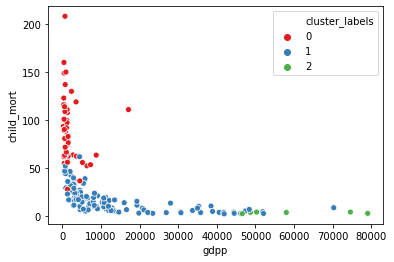

In [49]:
sns.scatterplot(x='gdpp', y = 'child_mort', hue= 'cluster_labels', data = df_hierarchy, palette = 'Set1')

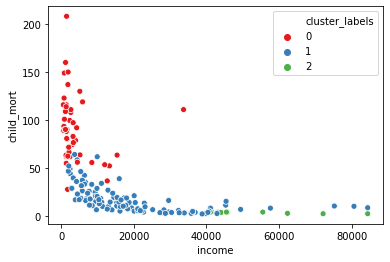

In [50]:
sns.scatterplot(x='income', y = 'child_mort', hue= 'cluster_labels', data = df_hierarchy, palette = 'Set1')

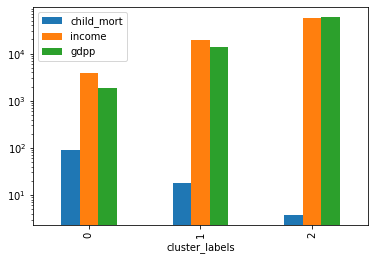

In [51]:
df_hierarchy.drop(['country','exports', 'health', 'imports', 
       'inflation', 'life_expec', 'total_fer'],axis=1).groupby('cluster_labels').mean().plot(kind='bar')
plt.yscale('log')

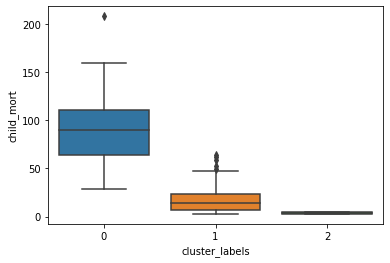

In [52]:
sns.boxplot(x = "cluster_labels", y = 'child_mort', data = df_hierarchy)

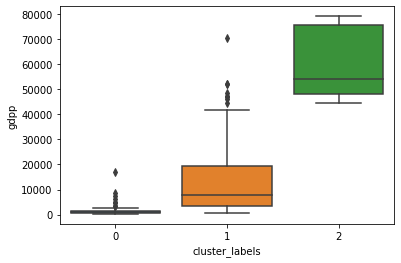

In [53]:
sns.boxplot(x = "cluster_labels", y = 'gdpp', data = df_hierarchy)

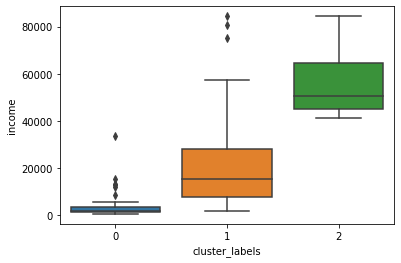

In [54]:
sns.boxplot(x = "cluster_labels", y = 'income', data = df_hierarchy)

The Box plot and Bar analysisindicates that the child mortality rate is higher in cluster 0 . Income per capita and gdpp seems lowest for countries in cluster 0 .It reflects that countries in cluster 0 need an urgent aid.


In [55]:
df_hierarchy[df_hierarchy['cluster_labels'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,0


In [56]:
df_hierarchy[df_hierarchy['cluster_labels'] == 0].sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,0


Thus we have performed  both K-means and Hierarchial clustering and found clusters formed are identical. The clusters formed in both the cases are same . However, we will proceed with the clusters formed by Hierarchial clustering since in hierarchical clustering, instead of pre-defining the number of clusters, we can visualise the similarity or dissimilarity between the different data points and based on these similarities and dissimilarities, we can decide the number of clusters. There is no need to predefine the value of k.

### FINAL ANALYSIS USING HIERARCHIAL  CLUSTERING 


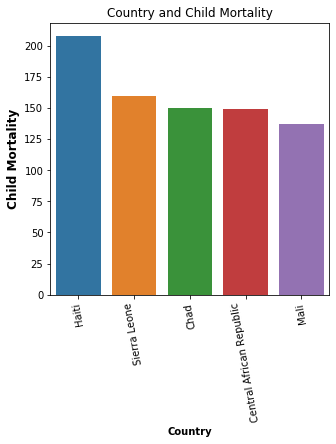

In [57]:
# BarPlot for Child Mortality of countries which are in need of aid
df_final = df_hierarchy[df_hierarchy['cluster_labels'] == 0].sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True,True]).head(5)
fig = plt.figure(figsize = (5,5))
sns.barplot(x='country', y="child_mort", data = df_final)
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 100)
plt.show()

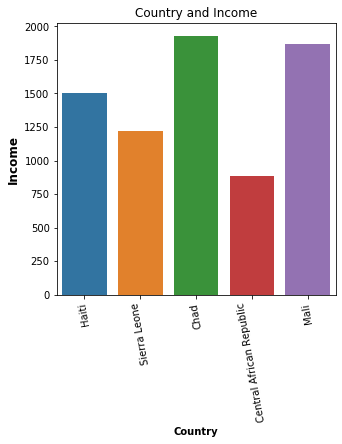

In [58]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x='country', y="income", data = df_final)
plt.title('Country and Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Income", fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 100)
plt.show()

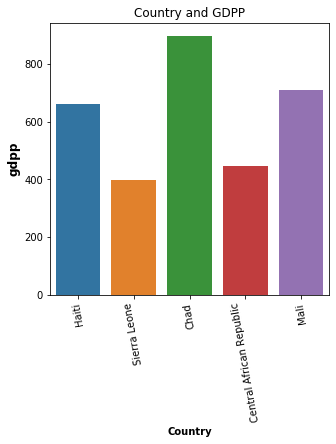

In [59]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x='country', y="gdpp", data = df_final)
plt.title('Country and GDPP')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("gdpp", fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 100)
plt.show()

Thus based on the factors i.e gdpp child mortality, income etc which plays a vital role in deciding the development status of the country , we derived at the 3 clusters. Based on those clusters we have identified the above mentioned countries which are in dire need of aid. 